Evaluation of HIV and AIDS Treatment Public Response In Haiti

In this research project, I wanted to look at how successful and impactful HIV treatment and efficacy of public health efforts in the country of Haiti.

In [37]:
import pandas as pd

# Step 1: Read CSV file
file_path = "HAITI_HIV_DATA.csv"  # <-- Replace with your actual file path
df = pd.read_csv(file_path, delimiter=",", header=0, na_values=[""])

# Ensure OBS_VALUE and TIME_PERIOD are numeric
df["OBS_VALUE"] = pd.to_numeric(df["OBS_VALUE"], errors="coerce")
df["TIME_PERIOD"] = pd.to_numeric(df["TIME_PERIOD"], errors="coerce")

# Drop rows with missing values in relevant columns
df = df.dropna(subset=["OBS_VALUE", "TIME_PERIOD", "Sex", "Indicator"])

# Step 2: Calculate the mean value of AIDS-related deaths
aids_deaths_df = df[
    df["Indicator"] == "Estimated rate of annual AIDS-related deaths (per 100,000 population)"
]
mean_values = aids_deaths_df.groupby("Sex")["OBS_VALUE"].mean()

# Output the results
print("Mean Value of AIDS-Related Deaths (per 100,000 population):")
for sex, mean_value in mean_values.items():
    print(f"{sex}: {mean_value:.2f}")


Mean Value of AIDS-Related Deaths (per 100,000 population):
Female: 7.39
Male: 7.28
Total: 7.33


In the script above, we looked at the average AIDS-realated death rate per 100,000 population. From this analysis, there is no significant gender disparity in AIDS related death. Let's take a look at additional visualizations. 

In [47]:
import pandas as pd

# Step 1: Read CSV file
file_path = "HAITI_HIV_DATA.csv"  # <-- Replace with your actual file path
df = pd.read_csv(file_path, delimiter=",", header=0, na_values=[""])

# Step 2: Ensure TIME_PERIOD is an integer
df["TIME_PERIOD"] = pd.to_numeric(df["TIME_PERIOD"], errors="coerce").astype("Int64")

# Step 3: Filter the DataFrame for the relevant indicator and years
percent_change_df = df[
    (df["Indicator"] == "Per cent of children (aged 0-14 years) living with HIV and receiving antiretroviral therapy (ART)") &
    (df["TIME_PERIOD"].isin([2010, 2023]))
]

# Step 4: Ensure OBS_VALUE is numeric
percent_change_df["OBS_VALUE"] = pd.to_numeric(percent_change_df["OBS_VALUE"], errors="coerce")

# Step 5: Ensure both 2010 and 2023 exist in the filtered DataFrame
if 2010 in percent_change_df["TIME_PERIOD"].values and 2023 in percent_change_df["TIME_PERIOD"].values:
    # Extract OBS_VALUE for 2010 and 2023
    value_2010 = percent_change_df[percent_change_df["TIME_PERIOD"] == 2010]["OBS_VALUE"].values[0]
    value_2023 = percent_change_df[percent_change_df["TIME_PERIOD"] == 2023]["OBS_VALUE"].values[0]

    # Calculate the percent change
    percent_change = ((value_2023 - value_2010) / value_2010) * 100

    # Output the result
    print("Percent Change of Children (aged 0-14 years) Living with HIV Receiving ART (2010-2023):")
    print(f"{percent_change:.2f}%")
else:
    print("Data for 2010 or 2023 is missing. Cannot calculate percent change.")

Percent Change of Children (aged 0-14 years) Living with HIV Receiving ART (2010-2023):
750.00%


/var/folders/c1/xz8hy24j2c95886pw6dhpqkw0000gn/T/ipykernel_96028/1354788165.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_change_df["OBS_VALUE"] = pd.to_numeric(percent_change_df["OBS_VALUE"], errors="coerce")


Betweeen 2010 and 2023, there is significant growth in people receiving HIV treatment. 
In July 2016, the Ministry of Public Health and Population (MSPP) in Haiti extended universal ART to all PLWH regardless of their CD4 count or clinical stage.
The implmentation of this initiative made a significant impact on health outcomes for people living with HIV. 

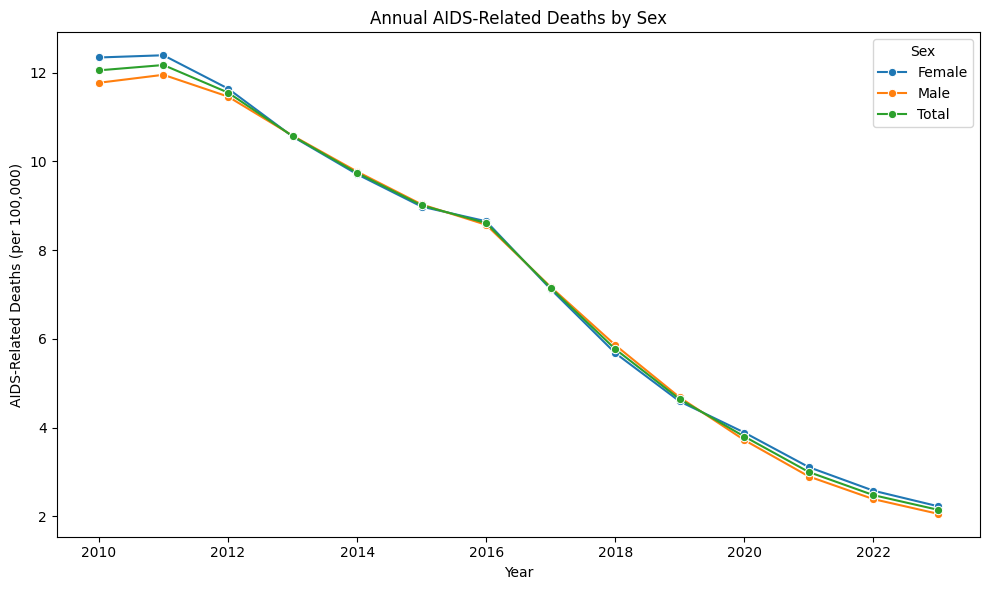

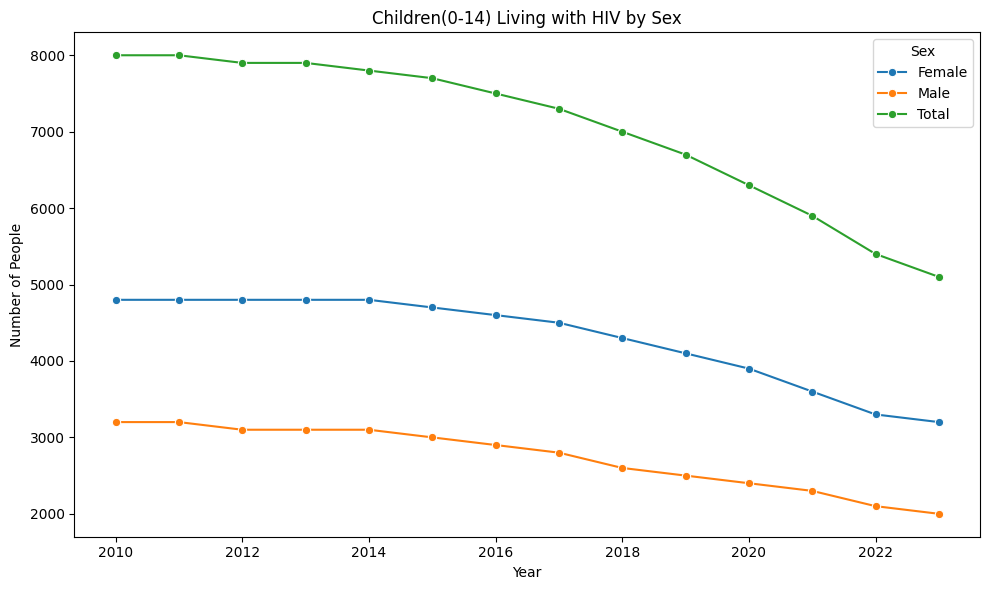

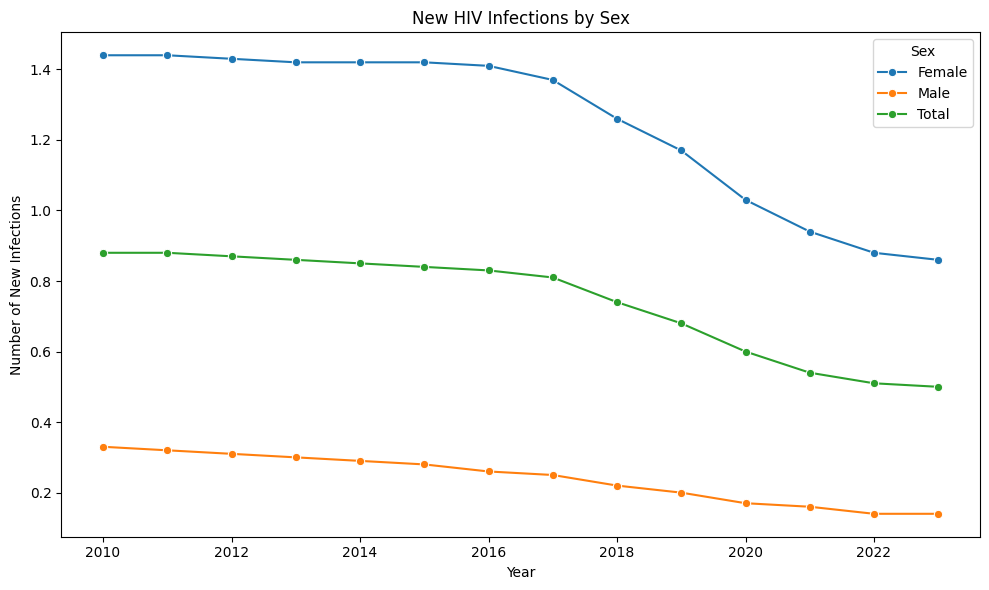

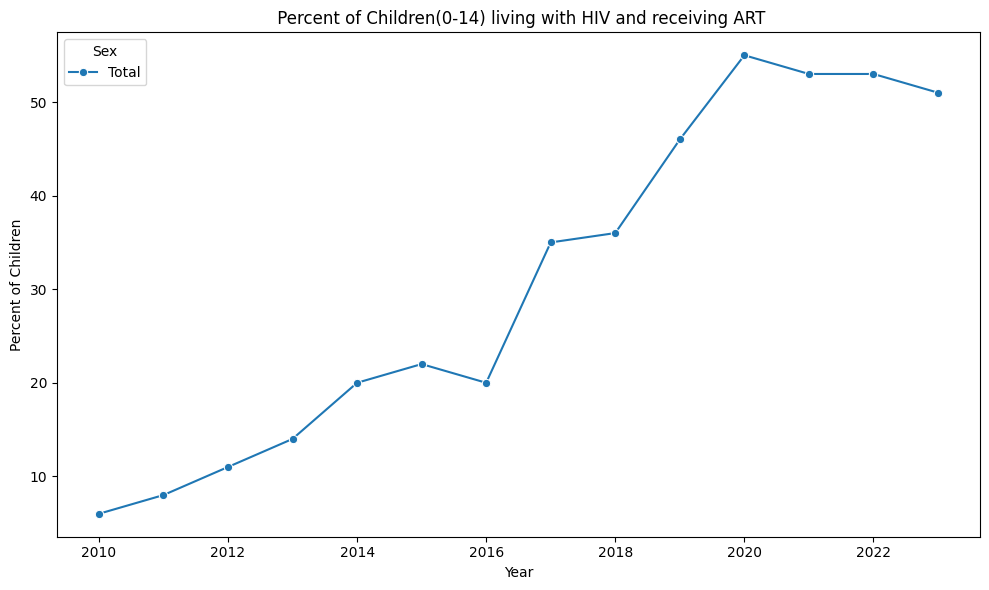

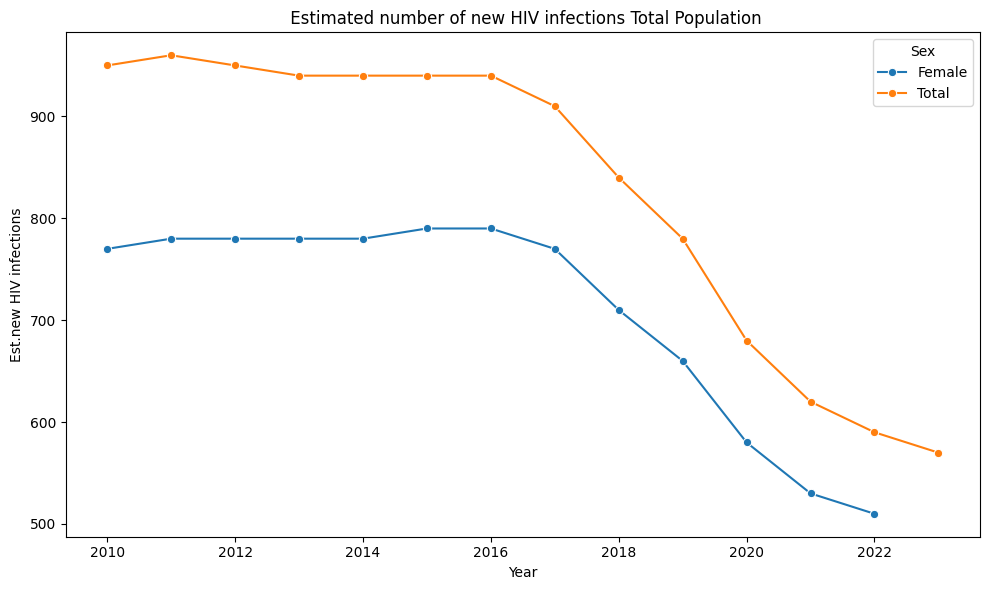

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read CSV file
file_path = "HAITI_HIV_DATA.csv"  # <-- Replace with your actual file path
df = pd.read_csv(file_path, delimiter=",", header=0, na_values=[""])

#Step 2: Data Cleaning 
#Ensure OBS_VALUE and TIME_PERIOD are numeric
df["OBS_VALUE"] = pd.to_numeric(df["OBS_VALUE"], errors="coerce")
df["TIME_PERIOD"] = pd.to_numeric(df["TIME_PERIOD"], errors="coerce")

# Drop rows with missing values in relevant columns
df = df.dropna(subset=["OBS_VALUE", "TIME_PERIOD", "Sex", "Indicator"])

# Function to plot a single indicator
def plot_indicator(indicator_name, title, y_label):
    # Filter the DataFrame for the given indicator
    subset = df[df["Indicator"] == indicator_name]

    # Check if the subset is empty
    if subset.empty:
        print(f"No data available for indicator: {indicator_name}")
        return

    # Plot the data
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=subset, x="TIME_PERIOD", y="OBS_VALUE", hue="Sex", marker="o")
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel("Year")
    plt.legend(title="Sex")
    plt.tight_layout()
    plt.show()

# Plot the three indicators
plot_indicator(
    indicator_name="Estimated rate of annual AIDS-related deaths (per 100,000 population)",
    title="Annual AIDS-Related Deaths by Sex",
    y_label="AIDS-Related Deaths (per 100,000)"
)

plot_indicator(
    indicator_name= "Estimated number of children living with HIV",
    title="Children(0-14) Living with HIV by Sex",
    y_label="Number of People"
)

plot_indicator(
    indicator_name="Estimated incidence rate (new HIV infection per 1,000 uninfected population)",
    title="New HIV Infections by Sex",
    y_label="Number of New Infections"
)
plot_indicator(
    indicator_name="Per cent of children (aged 0-14 years) living with HIV and receiving antiretroviral therapy (ART)",
    title= " Percent of Children(0-14) living with HIV and receiving ART",
    y_label="Percent of Children"
)





For Graph 1, AIDS deaths have decrease significantly in one decade. In 2016, the death started dropping much faster. The timepoint of 2016 appears to be a very important for HIV Public Health, as it has significance in other statistics. 

In Graph 4 - Percent of Children (0-14) living with HIV AND recieving ART, shows a sharp increase in starting in 2016. This may indicate that public health initiatives implemented near 2016 that increased access to ART medication had a significantly positive impact of health outcomes for HIV patients.

Something else to consider: As you can see in Graph 2 - New HIV Infections by Sex, while NEW HIV Infection rates are decreasing, there is a large disparity between male and females. The most recent year data, shows that females incidence rate is 5 times higher than males in Haiti. In the US, this opposite with males making up roughly 80% of new HIV infections. 

/var/folders/c1/xz8hy24j2c95886pw6dhpqkw0000gn/T/ipykernel_96028/2944859988.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_hiv_infections_df["OBS_VALUE"] = pd.to_numeric(new_hiv_infections_df["OBS_VALUE"], errors="coerce")


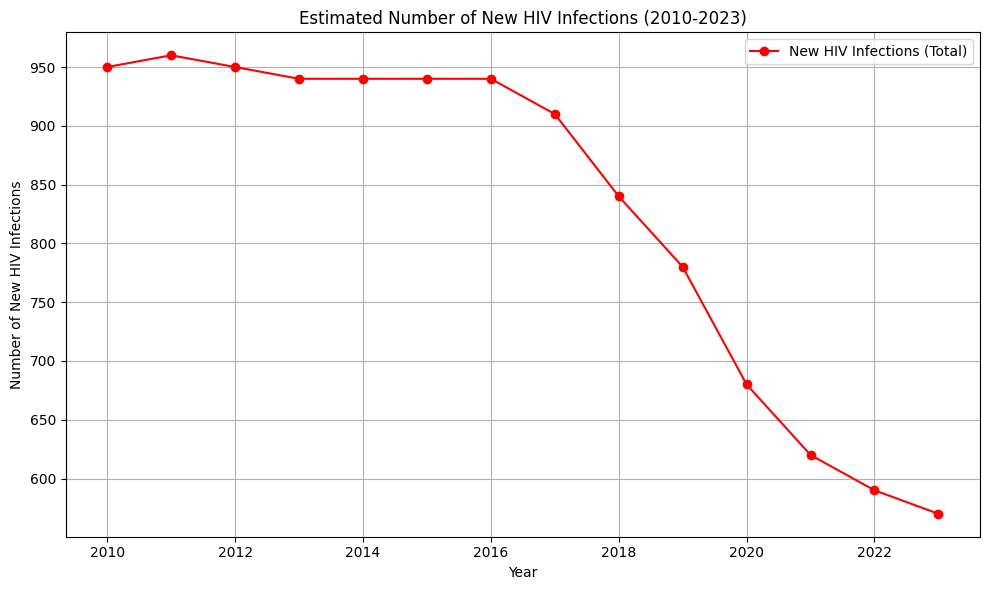

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read CSV file
file_path = "HAITI_HIV_DATA.csv"  # <-- Replace with your actual file path
df = pd.read_csv(file_path, delimiter=",", header=0, na_values=[""])

# Step 2: Ensure TIME_PERIOD is an integer
df["TIME_PERIOD"] = pd.to_numeric(df["TIME_PERIOD"], errors="coerce").astype("Int64")

# Step 3: Filter the DataFrame for the relevant indicator, years, and Sex == "Total"
new_hiv_infections_df = df[
    (df["Indicator"] == "Estimated number of new HIV infections") &
    (df["TIME_PERIOD"].between(2010, 2023)) &
    (df["Sex"] == "Total")
]

# Step 4: Ensure OBS_VALUE is numeric
new_hiv_infections_df["OBS_VALUE"] = pd.to_numeric(new_hiv_infections_df["OBS_VALUE"], errors="coerce")

# Step 5: Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(new_hiv_infections_df["TIME_PERIOD"], new_hiv_infections_df["OBS_VALUE"], marker="o", linestyle="-", color="r", label="New HIV Infections (Total)")
plt.title("Estimated Number of New HIV Infections (2010-2023)")
plt.xlabel("Year")
plt.ylabel("Number of New HIV Infections")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

Again, we notice that in 2016, there is a sharp decline in new infections. This would indicate if this initiative was implemented earlier, it could have had a stronger impact. 